1 - Read and Clean the Data

In [2]:
#Import necessary libraries
import pandas as pd

#Read data
data = pd.read_feather(r"C:\Users\omerf\OneDrive\Masaüstü\Data Analysis Project\Sales Data/Sales_data.ftr")
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
#Check for missing values
data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [4]:
#Drop missing values
data = data.dropna(how="all")
#Check it now
data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [5]:
#Check for duplicates
data[data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"


In [6]:
#Drop duplicates
data = data.drop_duplicates()
#Check it now
data[data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


2 - Analyze which product sold the most and why

In [7]:
#Define a function
def return_month(x):
    return x.split("/")[0]

In [8]:
#Apply function to data
data["Month"] = data["Order Date"].apply(return_month)
data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04


In [9]:
filter = data["Month"] == "Order Date"
data[filter] #Only one entry 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date


In [10]:
#Leave out this entry
data = data[~filter]

In [11]:
data["Quantity Ordered"] = data["Quantity Ordered"].astype(int)
data["Price Each"] = data["Price Each"].astype(float)

In [12]:
count_df = data.groupby(["Product"]).agg({"Quantity Ordered": "sum", "Price Each" : "mean"})
count_df 

,Quantity Ordered,Price Each
Product,,
20in Monitor,4126,109.99
27in 4K Gaming Monitor,6239,389.99
27in FHD Monitor,7541,149.99
34in Ultrawide Monitor,6192,379.99
AA Batteries (4-pack),27615,3.84
AAA Batteries (4-pack),30986,2.99
Apple Airpods Headphones,15637,150.00
Bose SoundSport Headphones,13430,99.99
Flatscreen TV,4813,300.00


In [13]:
count_df = count_df.reset_index()

In [14]:
products = count_df["Product"].values

C:\Users\omerf\AppData\Local\Temp\ipykernel_3224\2025288587.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation = "vertical", fontsize = 8)


Text(0, 0.5, 'Avg Price of Product')

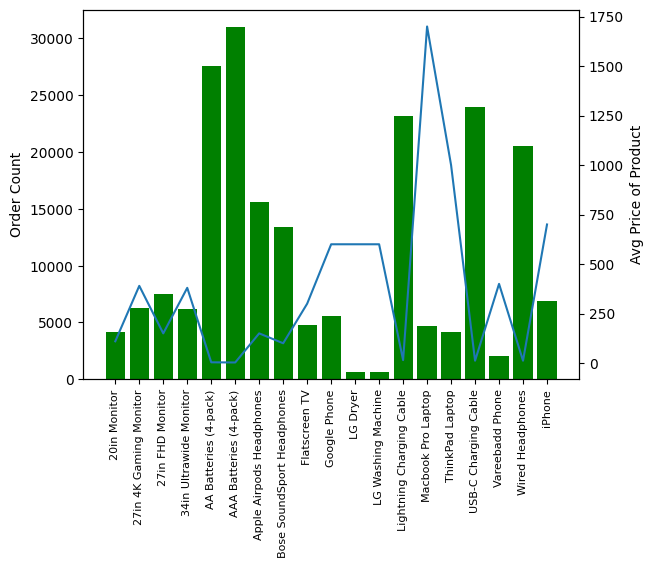

In [15]:
#Plot the data
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

#Quantitiy ordered
ax1.bar(count_df["Product"], count_df["Quantity Ordered"], color = "g")
#Price Each
ax2.plot(count_df["Product"], count_df["Price Each"])
ax1.set_xticklabels(products, rotation = "vertical", fontsize = 8)

ax1.set_ylabel("Order Count")
ax2.set_ylabel("Avg Price of Product")

You can say that top selling product have a correlation with the low price of the product. And fewest selling products have a correlation with their high price.

3 - Understanding the trend of most sold product

In [17]:
data["Product"].value_counts()[0:5].index

Index(['USB-C Charging Cable', 'Lightning Charging Cable',
       'AAA Batteries (4-pack)', 'AA Batteries (4-pack)', 'Wired Headphones'],
      dtype='object', name='Product')

In [18]:
most_sold_product = data["Product"].value_counts()[0:5].index

In [19]:
data_new = data[data["Product"].isin(most_sold_product)]

In [20]:
data_new.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [21]:
data_new.groupby(["Month","Product"]).size()

Month  Product                 
01     AA Batteries (4-pack)       1037
       AAA Batteries (4-pack)      1084
       Lightning Charging Cable    1069
       USB-C Charging Cable        1171
       Wired Headphones            1004
02     AA Batteries (4-pack)       1274
       AAA Batteries (4-pack)      1320
       Lightning Charging Cable    1393
       USB-C Charging Cable        1511
       Wired Headphones            1179
03     AA Batteries (4-pack)       1672
       AAA Batteries (4-pack)      1645
       Lightning Charging Cable    1749
       USB-C Charging Cable        1766
       Wired Headphones            1512
04     AA Batteries (4-pack)       2062
       AAA Batteries (4-pack)      1988
       Lightning Charging Cable    2197
       USB-C Charging Cable        2074
       Wired Headphones            1888
05     AA Batteries (4-pack)       1821
       AAA Batteries (4-pack)      1888
       Lightning Charging Cable    1929
       USB-C Charging Cable        1879
       W

In [23]:
pivot = data_new.groupby(["Month","Product"]).size().unstack()

<Axes: xlabel='Month'>

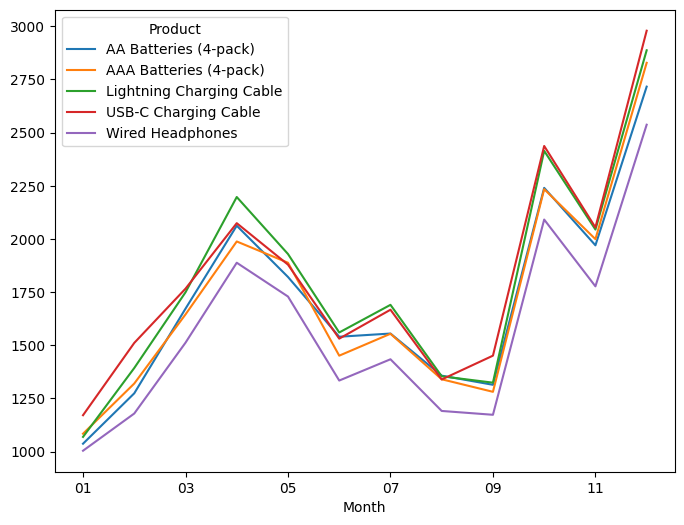

In [24]:
pivot.plot(figsize=(8,6))